<a href="https://colab.research.google.com/github/campusplage/compte-rendus-lekipcarre/blob/master/TP2_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse de données multidimensionnelles
## Entrez ici vos noms et prénoms

# TP 2: Utiliser l'analyse en composantes principales de `scikit-learn`




---
Ce notebook contient votre compte-rendu pour le TP2.
Il s'agit d'un travail que nous commencerons ensemble, puis que vous pouvez continuer de votre côté jusqu'à la date limite de soumission qui est le __lundi 2 décembre à 6h__.

---

# Manipuler github et soumettre votre travail (5 points)

> Vous serez notés sur votre aptitude à correctement soumettre votre travail par le biais d'un gestionnaire de version.
  __La procédure à suivre sera la même pour tous les TP. Sa mise en œuvre correspond au quart de la note.__

## b. Ouvrir votre travail

Vous avez deux options pour ouvrir votre notebook:
  * Sur la page de votre répo, cliquez dessus puis `open in colab`
  * directement sur [colab.research.google.com](colab.research.google.com), cliquez sur `File` $\rightarrow$ `Open notebook`, puis choisissez l'onglet `github` et retrouvez le colab après avoir sélectionné le bon répo.


## a. Sauvegarder votre travail

Vous êtes invités à régulièrement sauvegarder votre travail sur le répo (et non pas sur votre google drive uniquement).

Pour cela:
1. Cliquez sur `File` $\rightarrow$ `Save a copy in github`
2. Si c'est la première fois que vous le faites, autorisez l'accès à google colab l'accès à votre compte github. Suivez simplement les instructions.
3. Ensuite, sur la page qui s'affiche, sélectionnez le répo de votre compte rendu, puis `OK`. Appelez votre notebook `TP1.ipynb`.
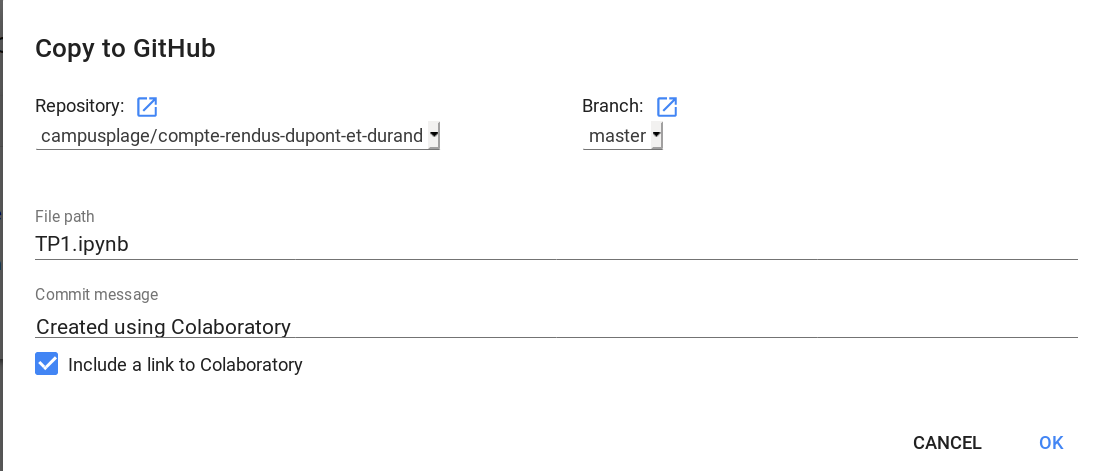

> Vous êtes chaleureusement invités à donner un message informatif pour décrire chaque `commit`, et donc à changer ce _created using colaboratory_ qui s'affiche par défaut. (Cela fera bien sûr partie des critères de notation).

## c. Récupérer une version plus ancienne

L'intérêt principal de travailler avec un gestionnaire de version comme git est de pouvoir à tout moment revenir en arrière !

Si vous en avez besoin, parcourez les différents _commits_ de votre répo, et chargez les fichiers correspondants.  
Tout est sauvegardé sur github ! C'est un énorme avantage par rapport à un google drive, un dropbox, un fichier en local, etc.

# 1. Charger et manipuler des données LFW (3 points)

## a. Téléchargement des données

Dans ce TP, nous allons travailler avec un autre ensemble de données provenant du challenge [_labeled faces in the wild_](http://vis-www.cs.umass.edu/lfw/). Il s'agit d'un ensemble de photos de visages en noir et blanc.

In [1]:
# différents imports utiles par la suite
# Comme pour chaque projet, on commence d'abord par importer tout nos modules
import pandas
import sklearn
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Téléchargement des données
d = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

## b. Accès aux données

Dans la cellule précédente, nous avons téléchargé des données contenant un gros milliers d'images noires et blanc de visages d'hommes politiques.  

Ces données sont regroupées dans variable `data_dict`, qui est un _dictionnaire_ ([dict](https://docs.python.org/3/library/stdtypes.html#mapping-types-dict)).

> Un dictionnaire est une structure de donnée qui permet de regrouper plusieurs valeurs hétérogènes, un peu à la manière d'une ligne donnée d'un `DataFrame` de pandas.
>
> Par exemple, on peut définir le dictionnaire suivant:
> ```python
student = {'name':'Dupont',
           'first name': 'Jean',
           'age': 23,
           'marks': [10, 13, 15.5, 11]
           }
  ```
> Il est constitué de 4 entrées appelées _clés_ (keys), qu'on peut lister par la méthode du même nom:
> ```python
  student.keys()
  ```  
> Et  on peut accéder à une entrée donnée par l'opérateur `[]` ou bien par `.`:
>```python
student['age']
student.age
```


In [2]:
# listez les clés de la variable `d`
d.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

## c. Manipulations élémentaires de `ndarrays`

Affichez le type de toutes les entrées de `d`

> utilisez les fonctions `print` et `type` dans une boucle `for`

In [3]:
# Par l'intermédiaire de notre boucle for qui balaye les élements un à un, nous affichons le type des entrées de d
a = list(d.keys())
for i in range (len(a)) :
  x = a[i]
  print(type(d[x]))
# On obtient ainsi la sortie python ci - dessous. On peut alors voir que nous avons 4 élements de types numpy array et un element str.

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'str'>


Comme vous le voyez, les données sont des [`ndarray`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html), la structure de base de la bibliothèque `numpy` qu'on a déja vue.

Cette structure très puissante de données numériques permet de facilement faire des calculs et accédez à des données.

In [4]:
# Affichez la dimension de d.images (utilisez la propriété `shape` des `ndarrays`)
from pylab import *
shape(d.images)

# (comme on le voit, c'est un tableau 3D.)

(1560, 50, 37)

In [0]:
# créez les variables nb_samples, height et width correspondantes
# (indice: testez d'abord `a, b, c = [1, 2, 3] )
nb_samples = shape(d.images)[0]
height = shape(d.images)[1]
width = shape(d.images)[2]

Comme vous le constatez, `d.images` regroupe $1560$ images, chacune étant de dimensions $50\times 37=1850$ pixels.

In [6]:
# chaque ligne de `d.data` n'est rien d'autre que la version aplatie de l'image
# correspondante dans `d.images`. 
print('Are d.data[10] and d.images[10].flatten() the same ?',
      np.allclose(d.data[10], d.images[10].flatten()))
# (où on a rencontré la fonction `allclose` de numpy qui compare des `ndarray`
# et la méthode `flatten` qui applatie un `ndarray`)


# en fait, on aurait pu construire cette version applatie très simplement, avec 
# la méthode `reshape` des `ndarray`:
flattened =  d.images.reshape((nb_samples, height * width))
print('Is `flattened` equal to `d.data` ? ', 
      np.allclose(flattened, d.data))

Are d.data[10] and d.images[10].flatten() the same ? True
Is `flattened` equal to `d.data` ?  True


In [7]:
# Pour extraire les 10 premières images, il suffit de faire:
d.data[:10]

# Pour extraire les pixels 50...99 des 10 premières images:
d.data[:10, 50:100]
# Il s'agit d'une sélection dans la ndarray `data`. C'est elle même une ndarray.
# 
print(d.data[:10, 50:100].shape)

(10, 50)


Maintenant, voyons quel est le nom des personnes dans les $10$ premières images.

In [8]:
# Première solution: commentez chaque ligne

# Afin de récupérer les 10 premières images, nous créons une boucle for qui va de 0 jusqu'à 9, puisqu'en python on commence à compter à partir de 0.
for index in range(10):
  #Puis l'on affiche le nom de chaque image en nous servant de l'index qui correspondant au numéro d'itération de notre boucle for. 
  print(d.target_names[d.target[index]])
  # On obtient ainsi la sortie python ci dessous, le nom de chaque individus.

Tony Blair
Gerhard Schroeder
Donald Rumsfeld
George W Bush
George W Bush
Colin Powell
Ariel Sharon
George W Bush
Colin Powell
George W Bush


In [11]:
# Deuxième solution: supprimez la boucle, et affichez ces 10 premières `target` directement
# (indice: utilisez [] deux fois, de manière imbriquée)
# Une deuxième méthode consiste à se servir directement d'un vecteur qui contient les index que l'on veut. Dans notre cas, nous voulons les 10 premiers,
# il nous suffit fonc simplement d'utiliser le vecteur[0:10] ou alors [:10]
d.target_names[d.target[0:10]]

array(['Tony Blair', 'Gerhard Schroeder', 'Donald Rumsfeld',
       'George W Bush', 'George W Bush', 'Colin Powell', 'Ariel Sharon',
       'George W Bush', 'Colin Powell', 'George W Bush'], dtype='<U17')

## b. Affichage 


Nous définissons maintenant deux fonctions utilitaires:
* `plot_images` qui prend en entrée: des images sous forme de lignes, un titre à indiquer pour la figure, et qui se charge d'un affichage
* `shuffle` mélange un lot d'images. C'est utile pour ne pas tout le temps afficher les mêmes premières si on n'a pas envie

In [0]:
#fonction utilitaire pour réorganiser aléatoirement des images
def shuffle(images):
  result = images.copy()
  np.random.shuffle(result)
  return result

# définition d'une fonction d'affichage
def plot_images(images, title='', n_row=3, n_col=4, shuffle=True):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row+0.5))
    plt.suptitle(title)
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.95, hspace=0, wspace=0)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((height, width)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

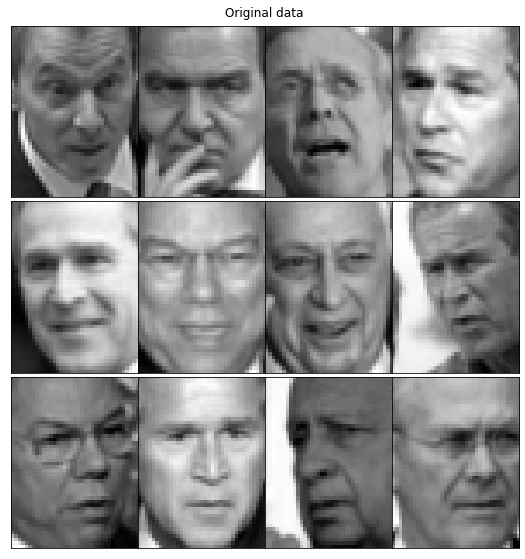

In [13]:
# Affichons les premières images
plot_images(d.data, 'Original data')

In [0]:
d.target

array([11,  4,  2, ...,  3, 11,  5])

In [14]:
# Ici, on créer une boucle for qui prend en compte deux paramètre simultanément.(l'index et le nom de l'individu)
for (i, name) in enumerate(d.target_names):
  # Puis l'on affiche l'index de l'individu, son nom ainsi que le nombre de matchs
  print('target %d, name: %s, number of matches: %d' % (i, name, np.sum(d.target == i)))

target 0, name: Ariel Sharon, number of matches: 77
target 1, name: Colin Powell, number of matches: 236
target 2, name: Donald Rumsfeld, number of matches: 121
target 3, name: George W Bush, number of matches: 530
target 4, name: Gerhard Schroeder, number of matches: 109
target 5, name: Hugo Chavez, number of matches: 71
target 6, name: Jacques Chirac, number of matches: 52
target 7, name: Jean Chretien, number of matches: 55
target 8, name: John Ashcroft, number of matches: 53
target 9, name: Junichiro Koizumi, number of matches: 60
target 10, name: Serena Williams, number of matches: 52
target 11, name: Tony Blair, number of matches: 144


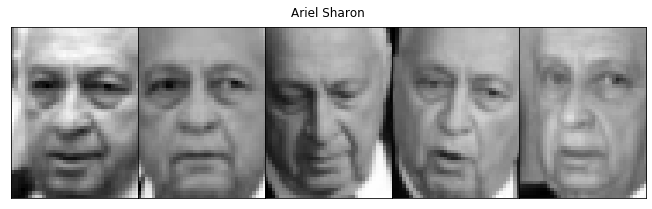

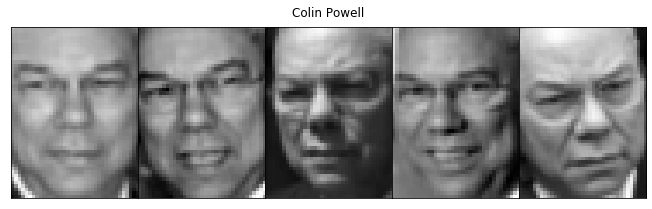

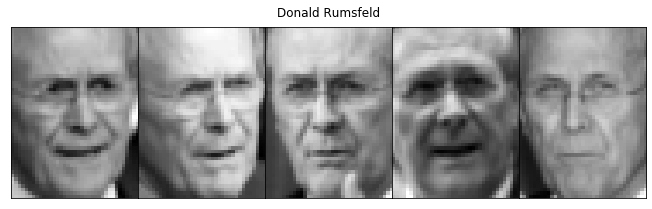

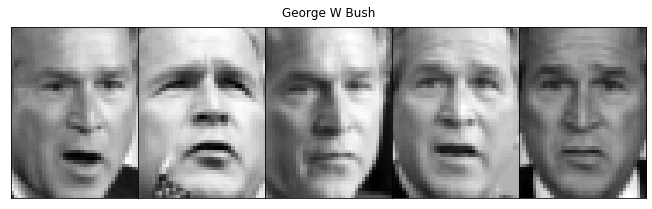

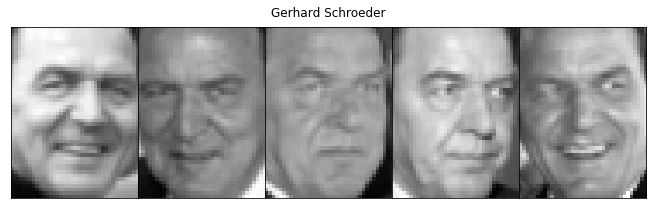

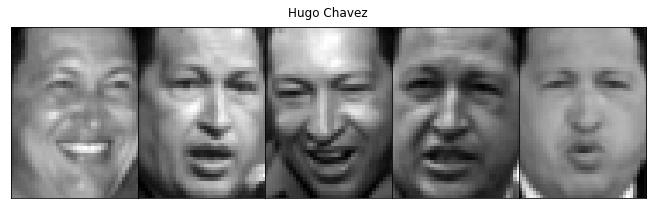

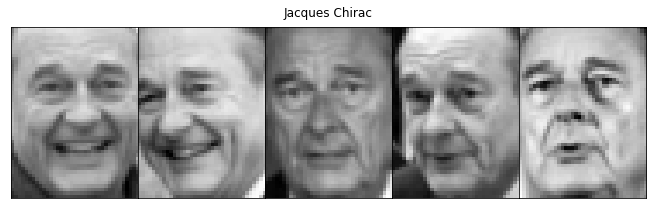

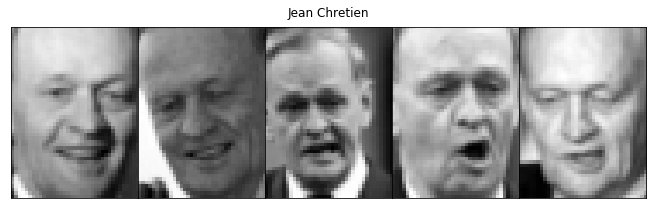

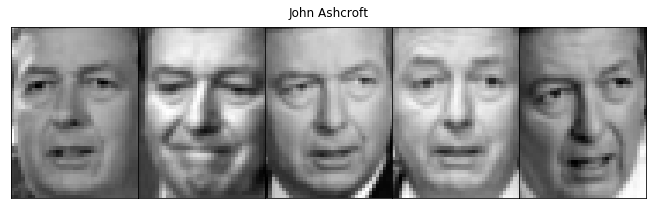

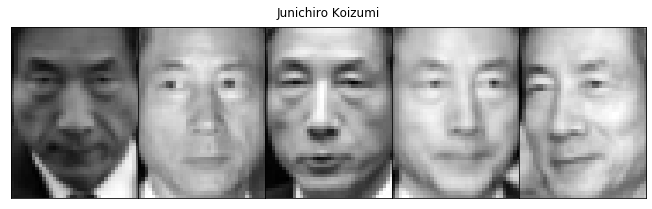

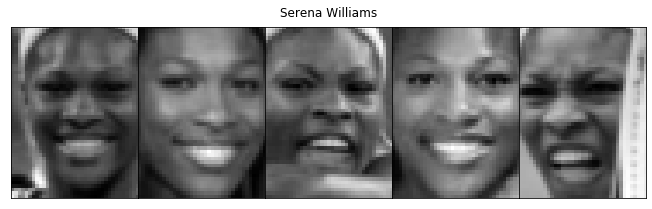

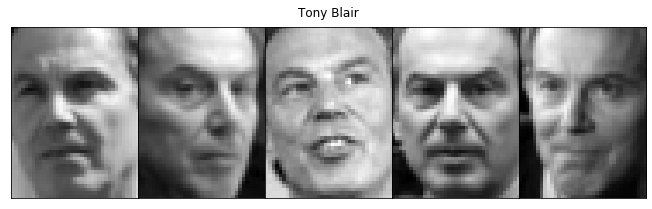

In [15]:
# Corsons un peu le problème:
# Pour chaque personnalité, affichez 5 photos de la base prises au hasard

# Ici, on crée encore une boucle for qui prend deux paramètres.
for (i, name) in enumerate(d.target_names) :
  # La différence de cette boucle avec la précédente réside dans le fait que l'on affiche ici les élements dont l'index i de la boucle for 
  # correspond également à leurs index dans d.
  plot_images(shuffle(d.data[d.target ==i]),name,n_row = 1,n_col =5)

# Exploitation simple d'une ACP (5 points)

## a. Apprentissage et reconstruction 

Dans les cellules suivantes, vous allez calculer une ACP sur ces données d'images.

Attention à la normalisation. Vous pouvez soit effectuer cette normalisation à la main, soit explorer un peu [la doc de sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

$\Rightarrow$ Appelez `data_pca` les données en basse dimension  
$\Rightarrow$ Appelez `reconstruction` le résultat de la fonction `pca.inverse_transform` appliqué à `data_pca`. De quoi s'agit-il ? Affichez le

In [0]:
# Créez l'objet pca, et entrainez le sur les données...
# On commence tout d'abord par choisir le nombre de composante.

n_components = 250
# Puis l'on crée notre ACP que l'on ajuste directement sur nos données
pca = PCA(n_components, whiten=True).fit(d.data)

# A la suite de quoi, nous avons transformé les données
data_pca = pca.transform(d.data)

# puis reconstruit les données à partir des données de l'ACP
reconstruction = pca.inverse_transform(data_pca)

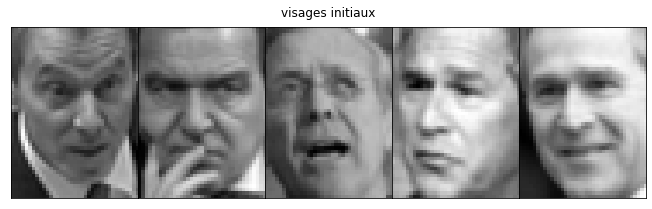

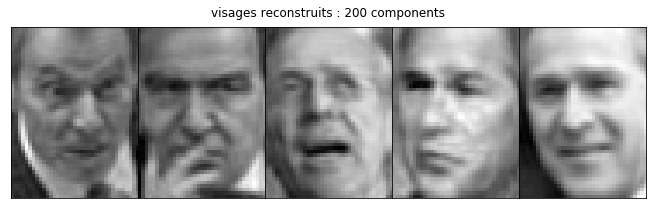

In [25]:
# Affichez sur une ligne les 5 premières images originales
plot_images(d.data, 'visages initiaux', n_row = 1, n_col = 5)

# Affichez sur une ligne leur reconstruction, en indiquant le nombre de composantes dans le titre
plot_images(reconstruction, 'visages reconstruits : 200 components', n_row = 1, n_col = 5)

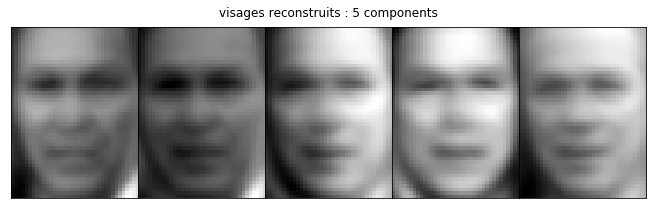

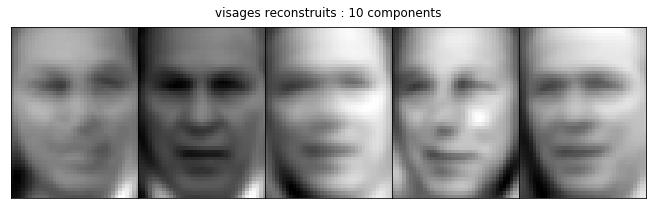

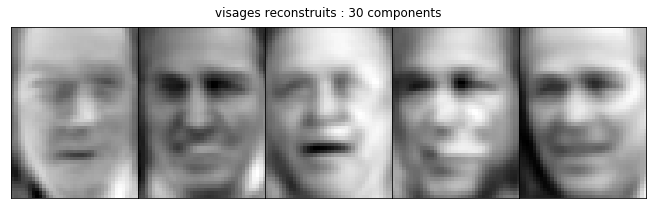

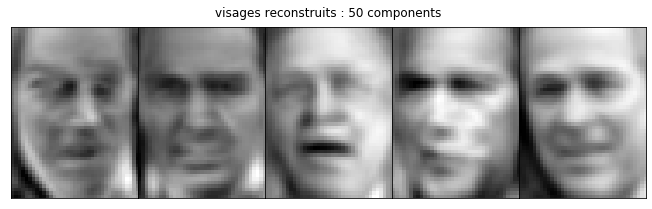

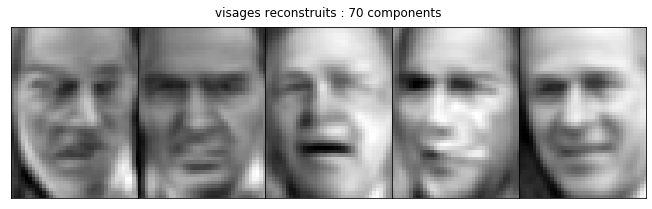

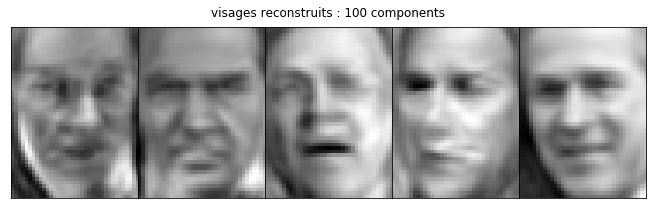

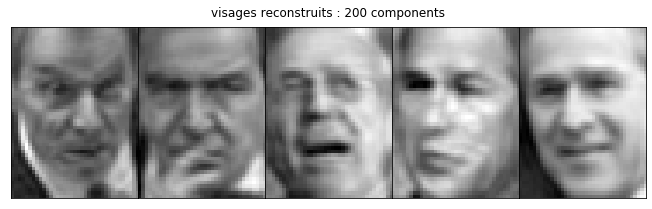

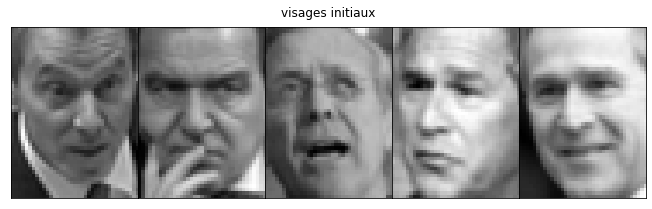

In [26]:
# Maintenant, pour les nombres de composantes suivants: 5, 10, 30, 50, 70, 100, 200, affichez les visages reconstruits sur une ligne
# puis les visages initiaux sur une ligne.
# Indice: vous avez deux options: réapprendre une ACP à chaque fois, ou bien réutiliser la même plusieurs fois.

# Ici, on créer une boucle for qui va réaliser une ACP avec un nombre de composante dépendament de de la liste suivante : 
# [5, 10, 30, 50, 70, 100, 200]
for ncomp in [5, 10, 30, 50, 70, 100, 200]:
  # On construit donc une ACP avec ncomp[i] composante
  data_pca = PCA(n_components=ncomp, whiten=True)
  # Puis l'on entraine cette ACP sur nos données
  data_pca.fit(d.data)
  # On peut alors transformer les données comme précédemment
  data_transformed = data_pca.transform(d.data)
  # et également reconstruire le jeu de données à partir des données de l'ACP
  reconstruction = data_pca.inverse_transform(data_transformed) 
  # Pour finir, on affiche les visages reconstruit par cette ACP 
  plot_images(reconstruction, 'visages reconstruits : %d components' % ncomp, n_row=1, n_col=5)

# Affichez sur une ligne les 5 premières images originales
plot_images(d.data, 'visages initiaux', n_row=1, n_col=5)


## b. Affichages par scores

Voyons si le score donné par l'ACP de `scikit-learn` peut être interprétable.

> Affichez les $10$ échantillons avec le meilleur score et les $10$ avec les pires scores. Interprétez  

[-8578.963  -8466.877  -8275.724  -8181.165  -8129.154  -8121.4556
 -8060.872  -8050.1    -8044.6074 -8032.0913]
[-6971.2637 -6967.7744 -6962.9336 -6960.1484 -6957.9844 -6956.1265
 -6950.264  -6948.0273 -6922.2026 -6886.431 ]


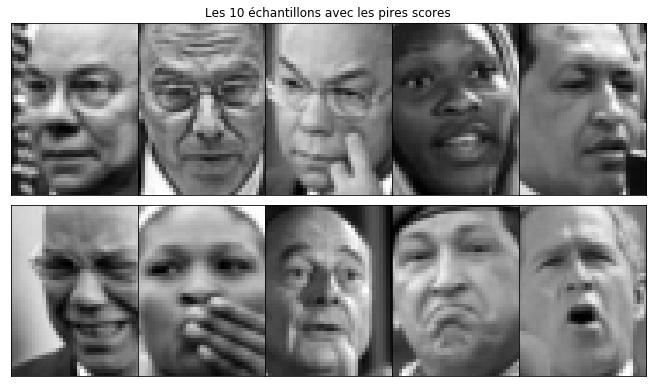

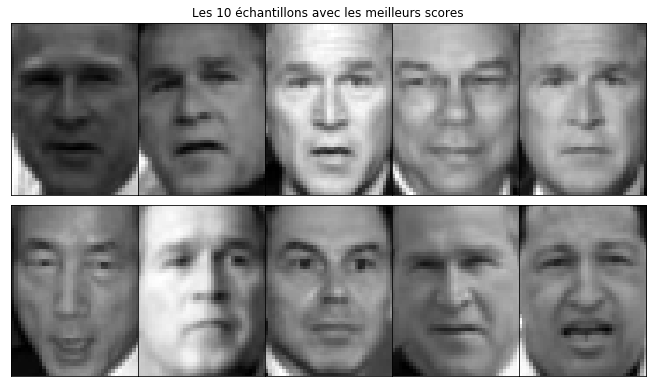

In [19]:
# extraction et tri des scores
score = pca.score_samples(d.data)
score_tri = np.argsort(score)
print(score[score_tri[:10]])
print(score[score_tri[-10:]])
# Affichage les 10 images avec le score le plus faible, et celles avec le score le plus élevé
plot_images(d.data[score_tri[:10]], title='Les 10 échantillons avec les pires scores', n_row=2, n_col=5)
plot_images(d.data[score_tri[-10:]], title='Les 10 échantillons avec les meilleurs scores', n_row=2, n_col=5)

__Interprétation__  
On remarque que les visages avec meilleurs scores sont de face et neutres. A l'inverse, les pires scores ont des expressions facales plus atypique (sourire, grimace...), ou la photo n'est pas de face.




## b. Interprétation et discussion

Dans cette section, vous allez étudier certains paramètres appris par l'ACP, les afficher, et créer une cellule de texte où vous donnerez une discussion courte de ce qui vous semble pertinent.

> * Pour les affichages:  
>   $\Rightarrow$ utilisez `plt.plot`, `plt.grid`  
>   $\Rightarrow$ mettez des titres, nommez les axes
> * Pour les discussions:
>   concentrez vous sur l'essentiel: je ne noterai __PAS__ la quantité.

### `pca.explained_variance_ratio`

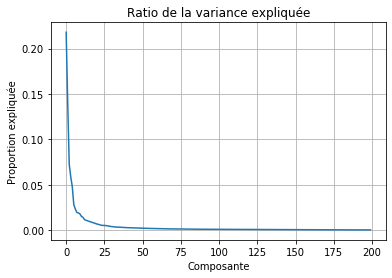

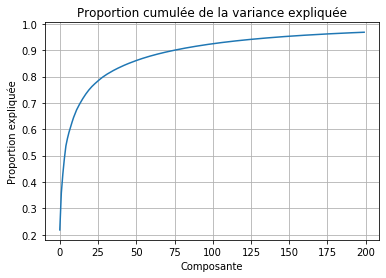

In [20]:
# Affichage de pca.explained_variance_ratio_, ainsi que de pca.explained_variance_ratio_.cumsum()

# Plot de pca.explained_variance_ratio_ -> plot de la variance expliquée
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.title('Ratio de la variance expliquée') # titre du raphique
plt.xlabel('Composante') # label axe x
plt.ylabel('Proportion expliquée') # label axe y
plt.grid() # affiche la grille

# Plot de pca.explained_variance_ratio_.cumsum() -> plot de la variance expliquée cumulée
plt.figure()
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title('Proportion cumulée de la variance expliquée')
plt.xlabel('Composante')
plt.ylabel('Proportion expliquée')
plt.grid()

__De quoi s'agit-il ?__  
La 1 ere courbe indique la variance de chaque composante.La 2 eme courbe indique la variance cummulé par composante.

__Interprétez__  
On observe que que autour de la 25 eme composante on obtient 80% de l'information. On obtient donc la majorité de l'information avec peu de compasant (proportionnelle au nombre totale de composante que l'on possède).

### `pca.components_`

In [23]:
# Ici, on affiche l'attribut shape de pca.components.
# Il ne s'agit pas d'une méthode de classe car il y aurait eu des parenthèses comme suit : pca.components_.shape()
print(pca.components_.shape)

# Cela devrait vous rappeler quelque chose. Affichez.
# En effet, ici, le 200 correspond aux nombre de composante de notre ACP que nous avons réalisés juste avant
print(pca.components_)

(200, 1850)
[[-0.00650594 -0.00801862 -0.01062142 ... -0.01184176 -0.01020916
  -0.00865476]
 [ 0.02155262  0.02057434  0.02251652 ... -0.04846998 -0.04678386
  -0.04477429]
 [ 0.03278257  0.03180619  0.03065745 ...  0.05173571  0.04628542
   0.04114388]
 ...
 [ 0.03985864  0.00173573 -0.03756328 ...  0.00109397  0.06889706
   0.05257759]
 [ 0.01089765 -0.01533237 -0.01985166 ... -0.05193723 -0.06620264
   0.04832241]
 [ 0.00055774 -0.00392646 -0.05639958 ...  0.0232694  -0.00234009
  -0.03914304]]


__De quoi s'agit-il ?__  
250 correspond au nombre de componantes que l'on a choisi et  1850 correspond à 50x37 qui est la dimension pixels de chaque image.

__Interprétez__  
pca_components_

# Analyses des précipitations en France (7 points)

Dans cette section, nous allons appliquer une ACP aux données de précipitations dans les grandes villes de France, déjà vues lors du premier TP. Il s'agit de rajouter l'ACP à l'arsenal d'outils de visualisation que nous avons vus. 

In [0]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chargeons les données
raw_data = pd.read_csv('https://husson.github.io/img/pluie.csv',
                       encoding = "ISO-8859-1", sep=';')

# renommons la première colonne "Ville"
raw_data = raw_data.rename(columns = {raw_data.columns[0]:'Ville'})

# choisissons cette colonne en index
raw_data = raw_data.set_index('Ville')

In [0]:
raw_data.head()

,JANVIERp,FEVRIERp,MARSp,AVRILp,MAIp,JUINp,JUILLETp,AOUTp,SEPTEMBREp,OCTOBREp,NOVEMBREp,DECEMBREp,Précipitations annuelles,JANVIERnb.j.pl,FEVRIERnb.j.pl,MARSnb.j.pl,AVRILnb.j.pl,MAInb.j.pl,JUINnb.j.pl,JUILLETnb.j.pl,AOUTnb.j.pl,SEPTEMBREnb.j.pl,OCTOBREnb.j.pl,NOVEMBREnb.j.pl,DECEMBREnb.j.pl,Nombre annuel de jours de pluie,Température moyenne annuelle,Amplitude annuelle des températures,Insolation annuelle,Latitude,Longitude,Précipitations de mai à aout,Précipitations sept-oct,Géographie
Ville,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ajaccio,78.0,69.0,51.0,39.0,43.0,23.0,10.0,15.0,43.0,81.0,105.0,96.0,653.0,12.0,10.0,9.0,9.0,8.0,4.0,1.0,2.0,6.0,10.0,11.0,13.0,95.0,14.71,14.5,2811.0,41.55,8.44,13.9,25.8,Sud
Angers,65.0,50.0,60.0,45.0,50.0,55.0,35.0,60.0,55.0,65.0,80.0,70.0,690.0,16.0,13.0,12.0,12.0,13.0,10.0,11.0,11.0,12.0,13.0,15.0,16.0,154.0,11.28,14.5,1899.0,47.28,-0.33,29.0,30.8,Ouest
Angoulème,79.0,68.0,64.0,62.0,70.0,58.0,53.0,66.0,69.0,70.0,79.0,88.0,826.0,16.0,14.0,13.0,12.0,14.0,11.0,12.0,12.0,12.0,13.0,15.0,16.0,160.0,12.02,14.9,1989.0,45.39,0.09,29.9,31.0,Ouest
Besançon,94.0,87.0,75.0,74.0,86.0,107.0,80.0,116.0,106.0,78.0,92.0,93.0,1088.0,17.0,14.0,12.0,14.0,14.0,14.0,14.0,13.0,13.0,14.0,15.0,15.0,169.0,10.04,17.6,1897.0,47.15,6.02,35.8,35.5,Est
Biarritz,128.0,105.0,98.0,102.0,100.0,91.0,69.0,123.0,155.0,152.0,175.0,176.0,1474.0,16.0,14.0,13.0,15.0,17.0,14.0,13.0,13.0,14.0,15.0,16.0,17.0,177.0,13.58,12.3,1921.0,43.29,-1.34,26.0,36.8,Ouest


## a. Utilisation simple ACP

Pour la suite:
1. Affichez une ACP des données de précipitations en 2D (deux composantes), avec pour chaque ville:
   * Son nom
   * La taille du point dépendant du volume total de précipitations
   * La couleur du point dépendant de la région.
2. Affichez une ACP du nombre de jours de pluie, calculée sur les colonnes (donc les mois), avec le nom des mois et la taille des points dépendants du nombre de jours de pluie moyen par mois. 


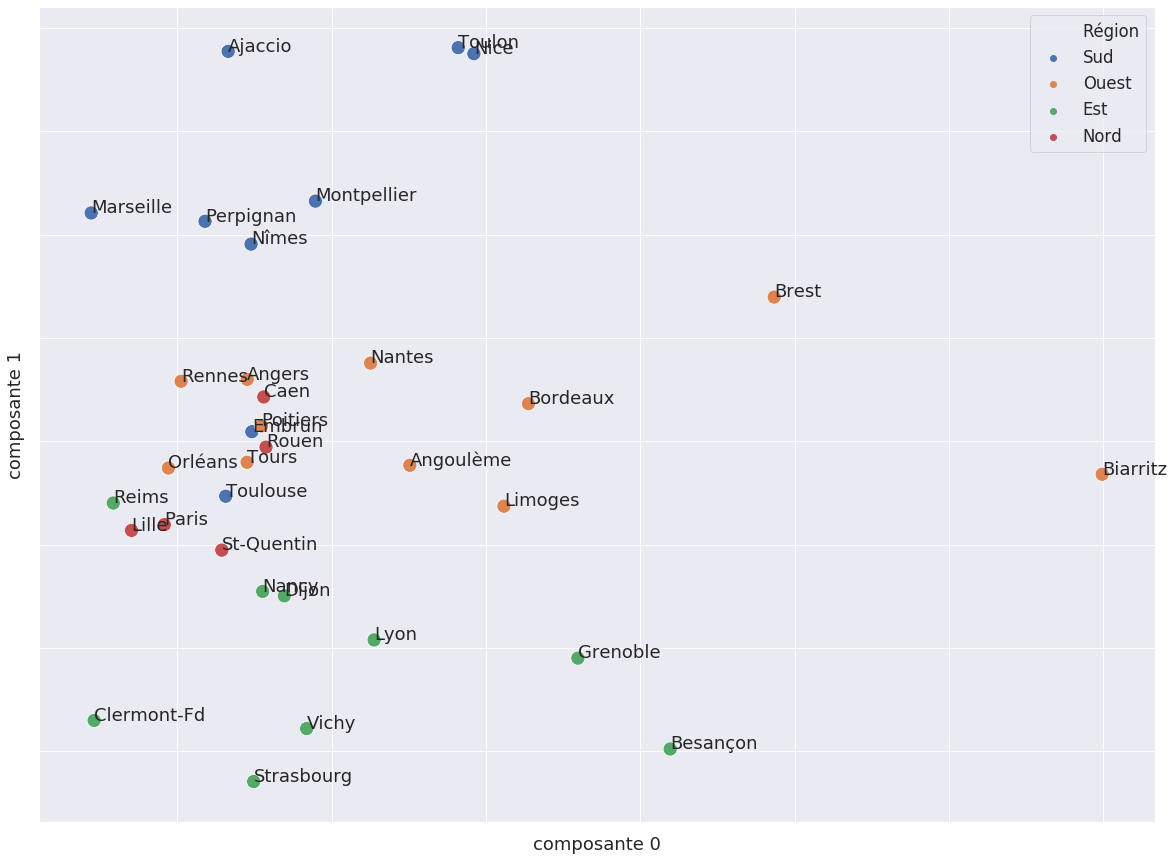

In [32]:
# ACP des précipitations par ville

# Importons scikit-learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extrayons les données de température
data_columns = raw_data.columns[:12]
x = raw_data[data_columns]

# On normalise les données
x = StandardScaler().fit_transform(x)
# Puis on créer et entraine notre ACP sur les données
n_components=2
pca = PCA(n_components).fit(x)
# Nous transformons ensuite les données et stockons cela dans une variable x_transformed
x_transformed = pca.transform(x)

pca_names = ['composante %d' % d for d in range(n_components)]
# On créer ensuite data_pca qui contient les données de l'ACP et plus précisement les coordonnées de chaque individus pour chaque dimensions.

data_pca = pd.DataFrame(x_transformed, index=raw_data.index,  columns=pca_names)


data_pca['Région'] = raw_data['Géographie']
sns.set(font_scale=1.5)
g = sns.scatterplot(x='composante 0', y='composante 1', data=data_pca, hue='Région', s=200)

plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])
plt.gcf().set_size_inches(20,15)

ax = plt.gca()
for i, (text_x,text_y) in enumerate(data_pca.iloc[:,:2].to_numpy()):
  ax.annotate(data_pca.index[i], (text_x,text_y))

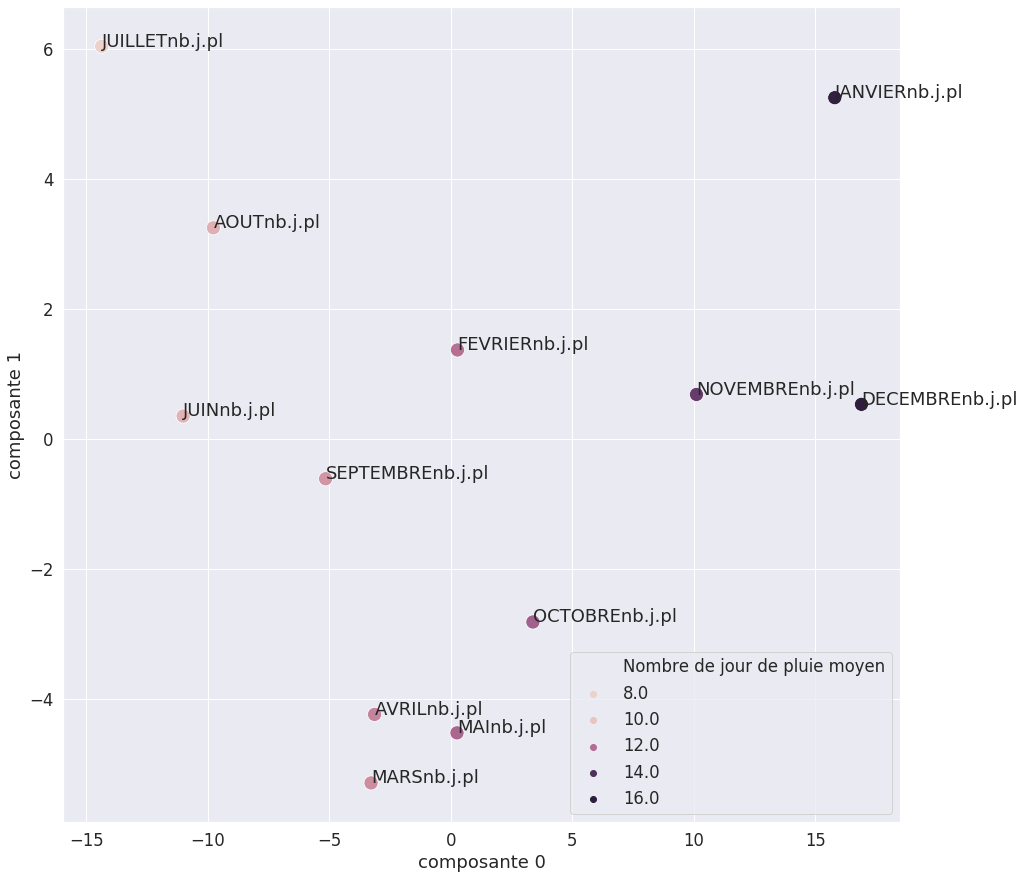

In [0]:
# ACP du nombre de jours de pluie par mois

xdata_columns = raw_data.columns[13:25]
x = raw_data[data_columns]
x = x.T

pca = PCA(n_components=2).fit(x)
x_transformed = pca.transform(x)

pca_names = ['composante %d' % d for d in range(2)]
data_pca = pd.DataFrame(x_transformed, index=x.index,  columns=pca_names)

data_pca['Nombre de jour de pluie moyen'] = raw_data[data_columns].mean().T

sns.set(font_scale=1.5)
g = sns.scatterplot(x='composante 0', y='composante 1', data=data_pca, hue='Nombre de jour de pluie moyen', s=200)

plt.gcf().set_size_inches(15,15)

ax = plt.gca()
for i, (text_x,text_y) in enumerate(data_pca.iloc[:,:2].to_numpy()):
  ax.annotate(data_pca.index[i], (text_x,text_y))



In [0]:
# ACP du nombre de jours de pluie par mois
data_columns = raw_data.columns[13:25]
x = raw_data[data_columns]
x = x.T
x.head()

x = StandardScaler().fit_transform(x)

xdata_columns = raw_data.columns[13:25]
x = raw_data[data_columns]
x = x.T

pca = PCA(n_components=2).fit(x)
x_transformed = pca.transform(x)

pca_names = ['composante %d' % d for d in range(n_components)]
data_pca = pd.DataFrame(x_transformed, index=raw_data.index,  columns=pca_names)

data_pca['Nombre de jour de pluie moyen'] = raw_data[data_columns].mean().T

sns.set(font_scale=1.5)
g = sns.scatterplot(x='composante 0', y='composante 1', data=data_pca, hue='Nombre de jour de pluie moyen', s=200)

plt.gcf().set_size_inches(20,15)

ax = plt.gca()
for i, (text_x,text_y) in enumerate(data_pca.iloc[:,:2].to_numpy()):
  ax.annotate(data_pca.index[i], (text_x,text_y))

ValueError: ignored

In [0]:
xdata_columns = raw_data.columns[13:25]
x = raw_data[data_columns]
x = x.T
x.index

Index(['JANVIERnb.j.pl', 'FEVRIERnb.j.pl', 'MARSnb.j.pl', 'AVRILnb.j.pl',
       'MAInb.j.pl', 'JUINnb.j.pl', 'JUILLETnb.j.pl', 'AOUTnb.j.pl',
       'SEPTEMBREnb.j.pl', 'OCTOBREnb.j.pl', 'NOVEMBREnb.j.pl',
       'DECEMBREnb.j.pl'],
      dtype='object')